0.00235104063242288


Text(0,0.5,'Infected Incidence')

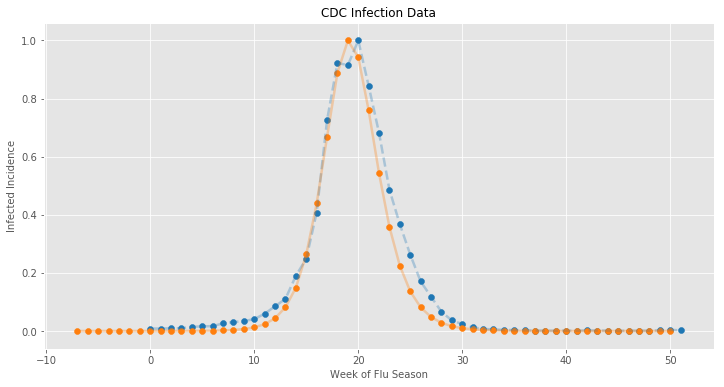

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

virusLibrary = [('B', 1.25), ('A (H1)', 1.30), ('A (H3)', 1.27), ('A (Subtyping not Performed)', 1.28)]

def weekTransform(row):
    if (row["WEEK"] >= 40):
        week = row["WEEK"] - 40
    else:
        week = row["WEEK"] + 12
    return(week)

df = pd.read_csv('WHO_NREVSS_Combined_2007_2008.csv', header=1)

df["idx: t"] = df.apply(weekTransform, axis=1)
df['Total'] = df[[x[0] for x in virusLibrary]].apply(lambda row: sum(row), axis=1)
totalRate = sum([x[1] for x in virusLibrary])/len(virusLibrary)
X = df['idx: t']

virusLibrary.append(("Total", totalRate))

virusSet = virusLibrary[4]
groundTruthSet = [virusLibrary[4][0]]

G = []
for groundTruth in groundTruthSet:
    G.append(df[groundTruth])
Y = [sum(y) for y in zip(*G)]

plt.style.use('ggplot')
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
    (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
N = 310000000
I0 = 1
R0 = 0
S0 = N - R0 - I0

gamma = 1.0/3.0
rho = virusSet[1]
beta = rho*gamma

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0

minT = -8
maxT = 51
t = list(range(minT*7, maxT*7))
w = range(minT+1, maxT)

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

incidence_predicted = -np.diff(S[0:len(S)-1:7])
incidence_observed = df[groundTruth]
fraction_confirmed = incidence_observed.sum()/incidence_predicted.sum()

P = incidence_predicted / max(incidence_predicted)
Y = df[groundTruth] / max(df[groundTruth])

print(mean_squared_error(Y[:-1], [x[1] for x in zip(w,P) if x[0] >= 0]))

plt.figure(figsize=(12,6))
plt.plot(X, Y, ls="--", lw=2.5, color=tableau20[0], alpha=0.3)
plt.scatter(X, Y, color=tableau20[0])
#plt.text(40, 100, "CDC Data for Influenza B", fontsize=12, color=tableau20[0])
plt.plot(w, P, lw=2.5, color=tableau20[2], alpha=0.3)
plt.scatter(w, P, color=tableau20[2])
plt.title("CDC Infection Data", fontsize=12)
plt.xlabel("Week of Flu Season", fontsize=10)
plt.ylabel("Infected Incidence", fontsize=10)

In [ ]:
df

0.02849792524263611


Text(0,0.5,'Infected Incidence')

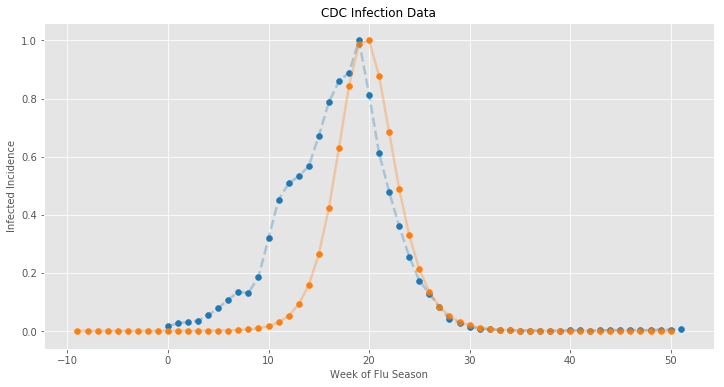

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
%matplotlib inline

virusLibrary = [('B', 1.25), ('A (H1)', 1.30), ('A (H3)', 1.27), ('A (Subtyping not Performed)', 1.28)]

def weekTransform(row):
    if (row["WEEK"] >= 40):
        week = row["WEEK"] - 40
    else:
        week = row["WEEK"] + 12
    return(week)

df = pd.read_csv('WHO_NREVSS_Combined_2010_2011.csv', header=1)

df["idx: t"] = df.apply(weekTransform, axis=1)
df['Total'] = df[[x[0] for x in virusLibrary]].apply(lambda row: sum(row), axis=1)
totalRate = sum([x[1] for x in virusLibrary])/len(virusLibrary)

virusLibrary.append(("Total", totalRate))

virusSet = virusLibrary[0]
groundTruthSet = [virusLibrary[0][0]]

X = df['idx: t']
Y = df[groundTruth]

plt.style.use('ggplot')
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
    (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
N = 310000000
I0 = 1
R0 = 0
S0 = N - R0 - I0

gamma = 1.0/3.0
rho = virusSet[1]
beta = rho*gamma

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0

minT = -10
maxT = 51
t = list(range(minT*7, maxT*7))
w = range(minT+1, maxT)

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

incidence_predicted = -np.diff(S[0:len(S)-1:7])
incidence_observed = df[groundTruth]
fraction_confirmed = incidence_observed.sum()/incidence_predicted.sum()

P = incidence_predicted / max(incidence_predicted)
Y = df[groundTruth] / max(df[groundTruth])

print(mean_squared_error(Y[:-1], [x[1] for x in zip(w,P) if x[0] >= 0]))

plt.figure(figsize=(12,6))
plt.plot(X, Y, ls="--", lw=2.5, color=tableau20[0], alpha=0.3)
plt.scatter(X, Y, color=tableau20[0])
#plt.text(40, 100, "CDC Data for Influenza B", fontsize=12, color=tableau20[0])
plt.plot(w, P, lw=2.5, color=tableau20[2], alpha=0.3)
plt.scatter(w, P, color=tableau20[2])
plt.title("CDC Infection Data", fontsize=12)
plt.xlabel("Week of Flu Season", fontsize=10)
plt.ylabel("Infected Incidence", fontsize=10)

0.003492072988767299


Text(0,0.5,'Infected Incidence')

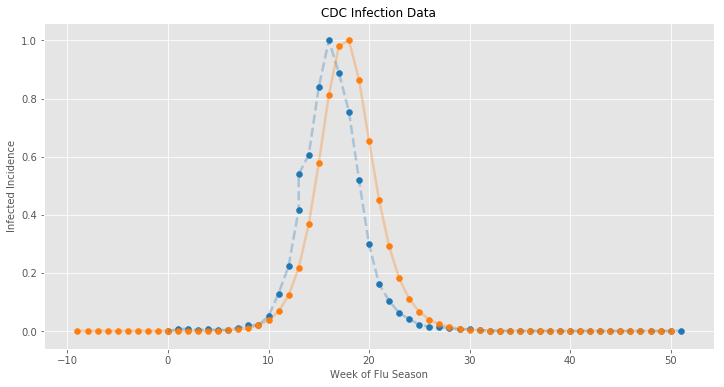

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
%matplotlib inline

virusLibrary = [('A (H3)', 1.27), ('A (Subtyping not Performed)', 1.28)]

def weekTransform(row):
    if (row["WEEK"] >= 40):
        week = row["WEEK"] - 40
    else:
        week = row["WEEK"] + 12
    return(week)

df = pd.read_csv('WHO_NREVSS_Combined_1997_1998.csv', header=1)

df["idx: t"] = df.apply(weekTransform, axis=1)
df['Total'] = df[[x[0] for x in virusLibrary]].apply(lambda row: sum(row), axis=1)
totalRate = sum([x[1] for x in virusLibrary])/len(virusLibrary)

virusLibrary.append(("Total", totalRate))

virusSet = virusLibrary[0]
groundTruthSet = [virusLibrary[0][0]]

X = df['idx: t']
Y = df[groundTruth]

plt.style.use('ggplot')
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
    (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
    (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
    (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
    (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
N = 310000000
I0 = 1
R0 = 0
S0 = N - R0 - I0

gamma = 1.0/3.0
rho = virusSet[1]
beta = rho*gamma

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0

minT = -10
maxT = 51
t = list(range(minT*7, maxT*7))
w = range(minT+1, maxT)

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

incidence_predicted = -np.diff(S[0:len(S)-1:7])
incidence_observed = df[groundTruth]
fraction_confirmed = incidence_observed.sum()/incidence_predicted.sum()

P = incidence_predicted / max(incidence_predicted)
Y = df[groundTruth] / max(df[groundTruth])

print(mean_squared_error(Y[:-2], [x[1] for x in zip(w,P) if x[0] >= 0]))

plt.figure(figsize=(12,6))
plt.plot(X, Y, ls="--", lw=2.5, color=tableau20[0], alpha=0.3)
plt.scatter(X, Y, color=tableau20[0])
#plt.text(40, 100, "CDC Data for Influenza B", fontsize=12, color=tableau20[0])
plt.plot(w, P, lw=2.5, color=tableau20[2], alpha=0.3)
plt.scatter(w, P, color=tableau20[2])
plt.title("CDC Infection Data", fontsize=12)
plt.xlabel("Week of Flu Season", fontsize=10)
plt.ylabel("Infected Incidence", fontsize=10)

In [68]:
df

,REGION TYPE,REGION,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,A (2009 H1N1),A (H1),A (H3),A (Subtyping not Performed),A (Unable to Subtype),B,H3N2v,idx: t,Total
0,National,X,1997,40,1291,0.000000,0,0,0,0,0,0,0,0,0
1,National,X,1997,41,1513,0.727032,0,0,0,11,0,0,0,1,11
2,National,X,1997,42,1552,1.095360,0,0,3,13,0,1,0,2,17
3,National,X,1997,43,1669,0.419413,0,0,0,7,0,0,0,3,7
4,National,X,1997,44,1897,0.527148,0,0,9,1,0,0,0,4,10
5,National,X,1997,45,2106,0.284900,0,0,0,6,0,0,0,5,6
6,National,X,1997,46,2204,0.362976,0,0,3,4,0,1,0,6,8
7,National,X,1997,47,2533,0.908014,0,0,5,17,0,1,0,7,23
8,National,X,1997,48,2242,1.650310,0,0,14,22,0,1,0,8,37
9,National,X,1997,49,2607,1.534330,0,0,11,28,0,1,0,9,40
